# SOM

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# Importing the dataset
df = pd.read_csv('kr_2.csv', sep=';')
df.head(20)

,RetailSpace,Type,NumberOfReviewInGoogle,The_average_number_of_units_in_the_check,human_traffic,AverageIncomeOfThePopulation,Stop_GT,The_final_stop_of_the_GT,Crosswalk,Specialized_bread,Success
0,0,0,42.820513,0,5211.000000,15610.000000,1,0,0,1,0
1,1,0,8.000000,1,2424.000000,12600.000000,1,1,0,0,0
2,2,1,42.820513,2,3868.000000,12600.000000,1,0,1,1,0
3,3,1,42.820513,3,4546.000000,13930.000000,1,0,0,1,0
4,1,1,42.820513,4,3244.000000,16030.000000,0,0,0,0,0
5,4,0,9.000000,5,2560.000000,12320.000000,0,0,0,1,0
6,5,0,21.000000,6,1842.000000,16100.000000,0,0,1,0,1
7,6,0,227.000000,7,412.000000,12180.000000,0,0,0,1,1
8,7,0,42.820513,8,233.000000,13930.000000,0,0,0,0,0
9,8,0,17.000000,9,978.000000,14560.000000,0,0,1,0,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)

In [4]:
X = df[:, [0, 3, 5, 6, 8, 9, 10 ]]

In [5]:
! pip install SimpSOM

  Using cached SimpSOM-1.3.4-py3-none-any.whl


In [6]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(10, 7, X, PBC=True)
net.train(0.01, 20000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


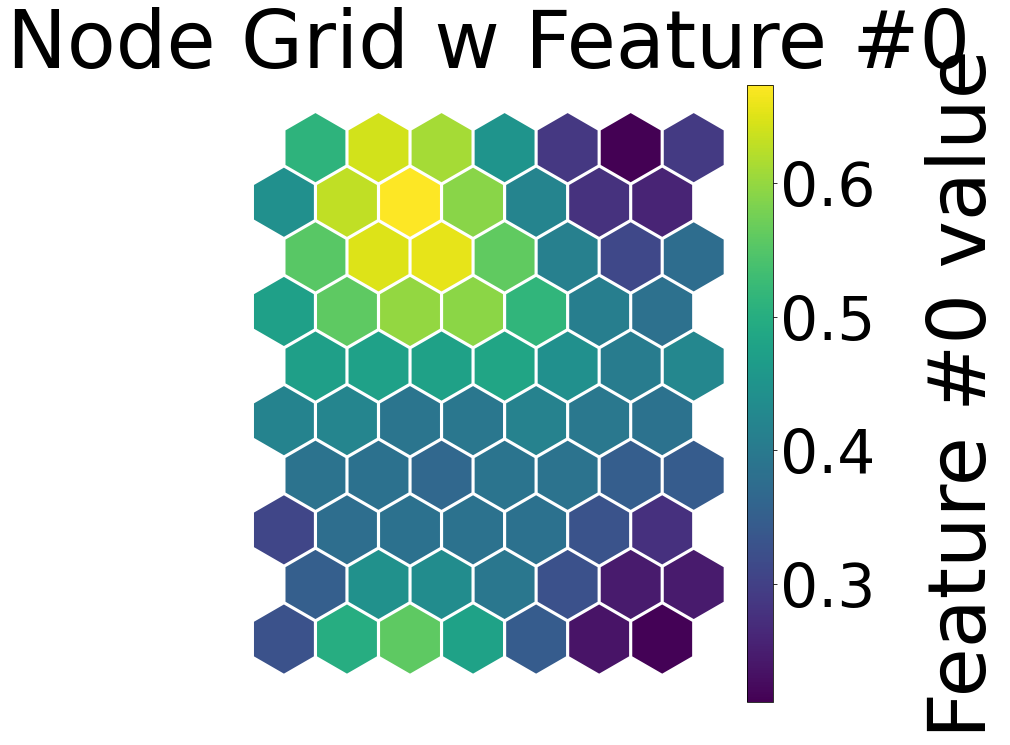

In [7]:
net.nodes_graph(colnum=0)

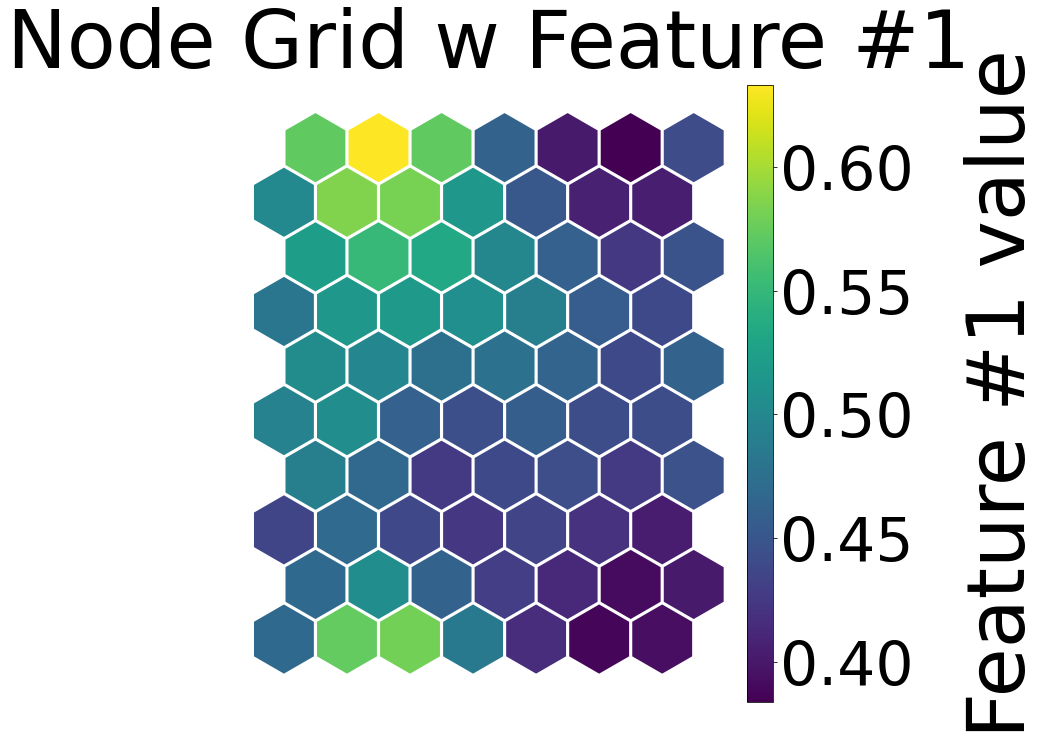

In [8]:
net.nodes_graph(colnum=1)

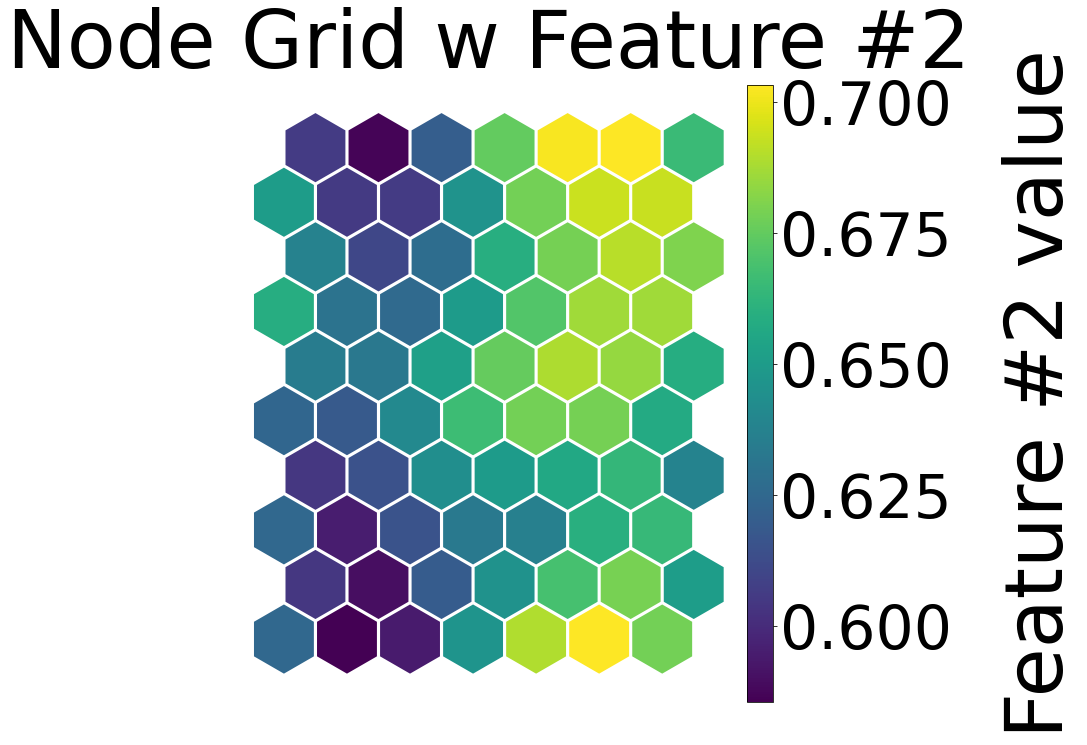

In [9]:
net.nodes_graph(colnum=2)

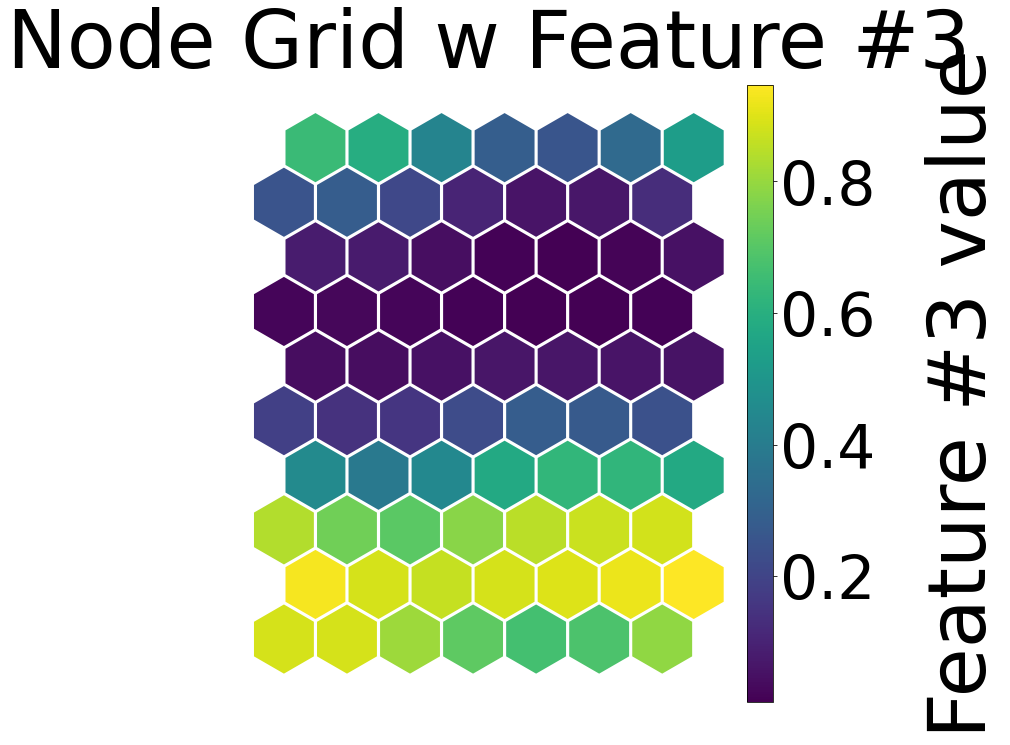

In [10]:
net.nodes_graph(colnum=3)

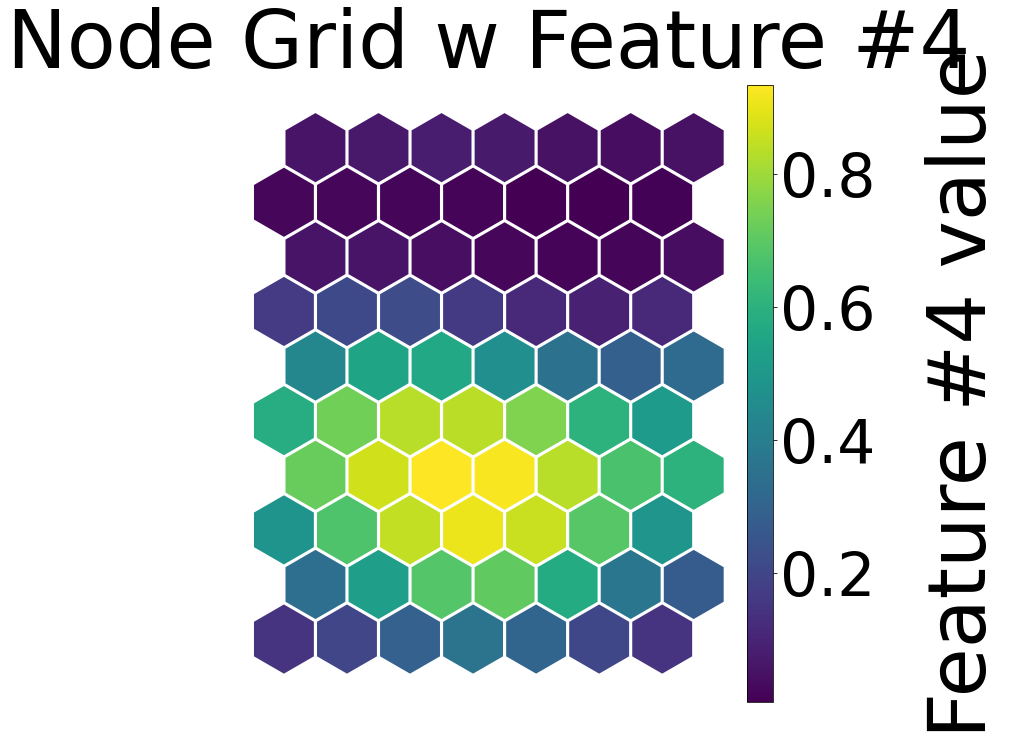

In [11]:
net.nodes_graph(colnum=4)

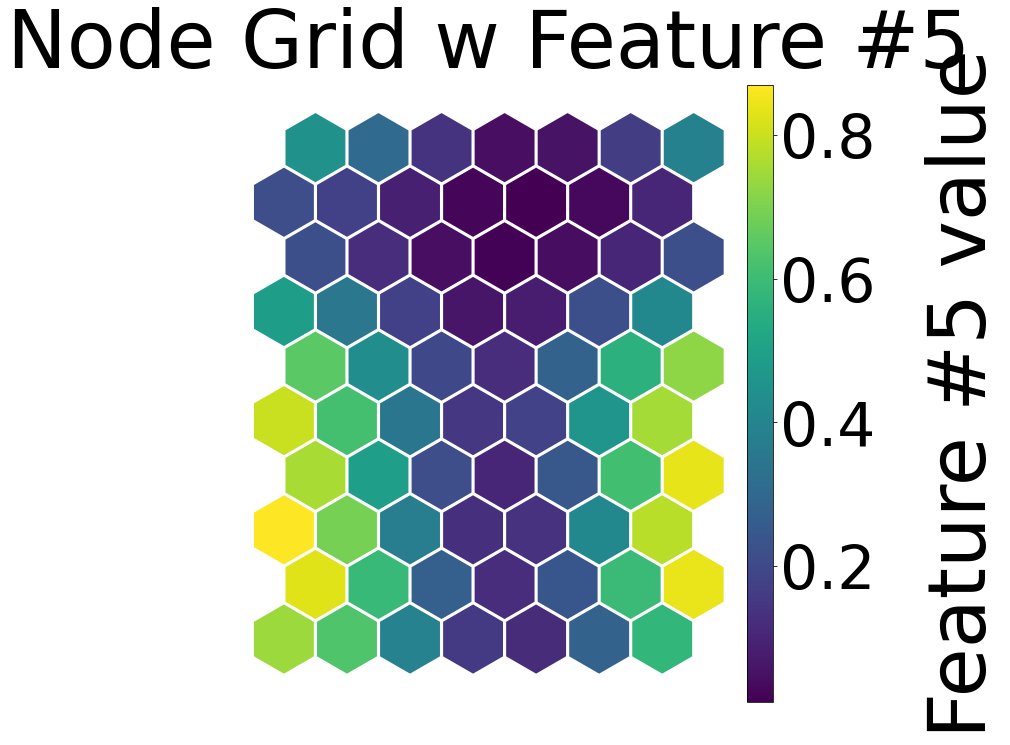

In [12]:
net.nodes_graph(colnum=5)

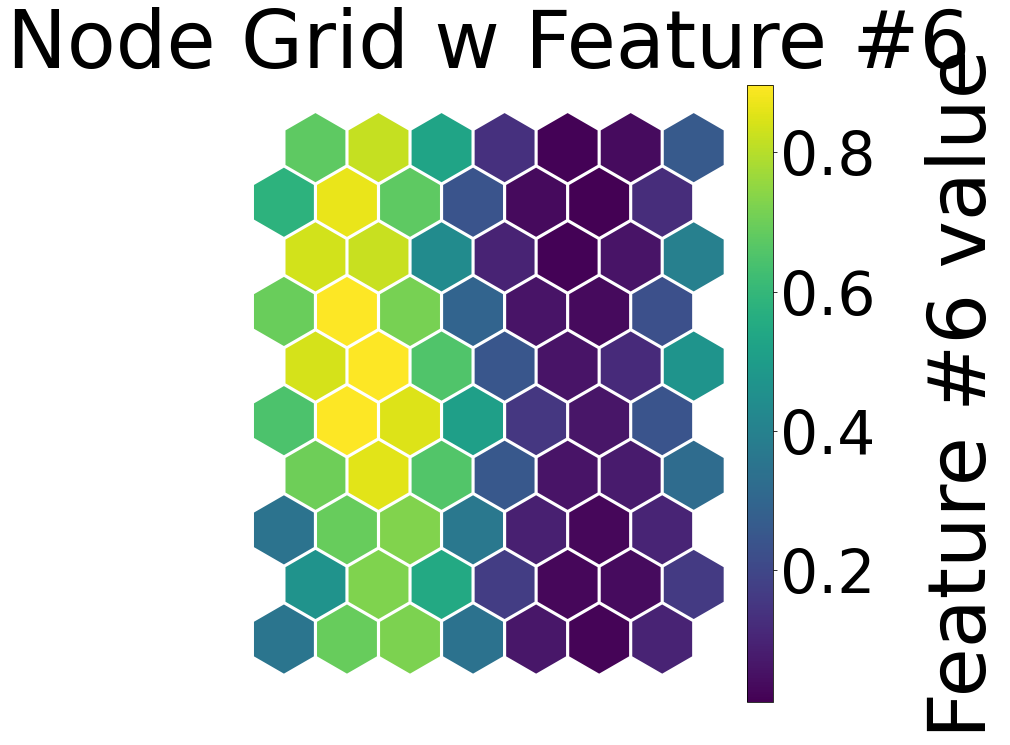

In [13]:
net.nodes_graph(colnum=6)

Таким образом, получен набор карт по каждому фактору. Чтобы понять и предположить оптимальное число кластеров попробуем исходя из последней карты (success) определить сложившуюся ситуацию. Слевой стороны расположились успешные магазины, ближе к центру - неупешные, а справа тонкой полосой магазины со средним уровнем успешности. Допустим берем вторую сверху ячейку в первом ряду. Попробуем ее описать по каждой карте:
Площадь - соответствует магазину с большой площадью
Среднее число товаров в чеке - максимальное по выборке
Доход населения - на среднем уровне (однако это не значит, что человек будет покупать ограниченное число продуктов)
Остановка - скорей всеего в данный класс магазинов люди приезжают на машине,  поэтому наличие остановки для них не играет роли
Аналогичная ситуация с пешеходным переходом.
Однако наличие выпички на среднем уровне, не обязательный фактор.

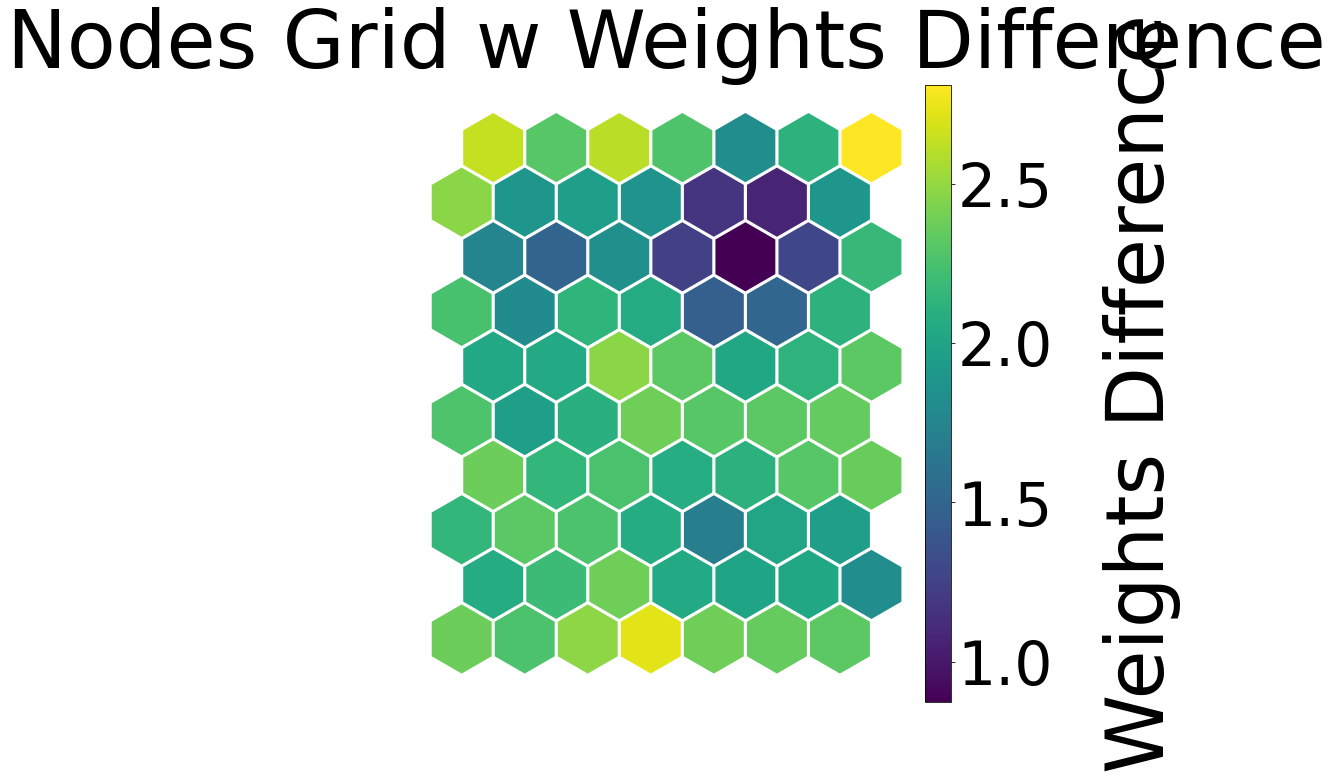

In [14]:
net.diff_graph()

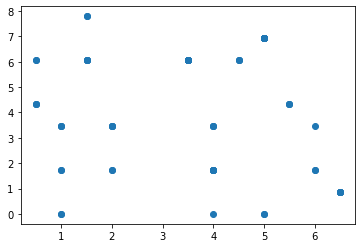

In [15]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

График расстояний между совокупностями обьектов не дает точных данных сколько кластеров нужно выделить. Множество точек находится на большом расстоянии друг от друга. Возможно, как раз и можно выделить полученные нами 4 кластера. Однако, учитывая предыдущие исследования принимаем решение о целесообразности 4ех кластеров.

In [16]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(prj)

In [17]:
# Importing hc clusters
import pickle
input = open('clust-hc1.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc1 = obj["hc1"]

In [18]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc1,kmeans.labels_)

0.4307469602065925

In [21]:
# Importing km clusters
import pickle
input = open('clust-km1.pkl', 'rb')
obj = pickle.load(input)
input.close()
km1 = obj["km1"]

In [22]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km1,kmeans.labels_)

0.5646350387656223

Полученные результаты совпадают на среднем уровне с проделанными раннее методами. Возможно, при уменьшении числа кластеров % увеличится и пересечение результатов станет выше. Однако, в конечном итоге получаем модель с четырьмя кластерами. Осталось интерпретировать результаты.

In [30]:
X_var = df.iloc[:, [0, 3, 5, 6, 8, 9, 10 ]]

In [31]:
# Fitting K-Means to the dataset
km1 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X_var)
kms1 = KMeans(n_clusters = 4, random_state = 0).fit(X_var)
pd.DataFrame(kms1.cluster_centers_, columns = ['RetailSpace','The_average_number_of_units_in_the_check','AverageIncomeOfThePopulation','Stop_GT','Crosswalk','Specialized_bread','Success']).round(2)

,RetailSpace,The_average_number_of_units_in_the_check,AverageIncomeOfThePopulation,Stop_GT,Crosswalk,Specialized_bread,Success
0,0.19,0.24,0.90,0.00,0.10,0.10,0.00
1,1.00,0.83,0.67,0.28,0.17,0.39,0.72
2,0.21,0.32,0.68,0.95,0.53,0.53,0.05
3,0.09,0.09,0.91,0.18,0.73,0.27,1.00


Итак, имеем 4 класса магазина: отталкиваясь от возможного типа магазина для данного исследования выделим 1)микромаркет 2)простой магазин  3)стандарт и 4)магазин премиум класса
Опишем каждый из них:

1)Микромаркет - это магазины с очень маленькой площадью, где клиент покупает товары только первой необходимости, поэтому низкое число среднего количества продуктов в чеке, при этом магазины посещают люди с высоким достатком. Почему так происходит? Я предпологаю, что это в большинстве случаев мелкие магазины в центре города, где явно завышены цены. Соответсвенно наличие остановки рядом не играет роли и как мы видим - близко к тому, что их нет. Но при этом есть пешеходный переход, который действительно много в центре города. Частной выпечки нет, но самое важное, что такие магазины являются успешными. (описан 3 кластер)

2)Простой по размеру магазин  (что-то среднее между минимаркетом и стандартным магазином). В принципе похожие характеристики с предыдущими видом магазина, однако, могу предположить, что данного типа магазины находятся, не в самом центре, а уже ближе к каким-то жилим районам. На это указывает отсутствие пешеходных поблизости, но при этом более приемлемы цены и соответсвенно выше среднее количество товара в чеке. Но интересно то, что данные магазины не являются успешными. Возможно, из-за большой конкуренции в округе. (описан 0 кластер)

3)Стандартный магазин. По размеру он не сильно отличается от простого, но цены здесь более приемлемы и большее количество товаров покупается. Посетители - люди со средним доходом. При этом рядом с такими магазинами есть остановка и пешеходный переход. Скорей всего это магазины в жилых районах города, подальше от центра. Однако они так же неуспешны. Опять же могу предположить, что высокая конкуренция, много лет не делается ребрендинг (допустим, создание "черного" АТБ, как вариант исправления данной тенденции). Так же магазины скорей специализируются на собственной выпечке (описан 2 кластер)

4)Магазины премиум класса. Они самые большие по площади. Это гипермаркеты уровня Metro. Люди сюда ездят чтобы делать глобальные закупки и поэтому большое число товаров в чеке. Население со средним типо дохода. Остановки и пешеходного нет рядом, но как было упомянуто ранее - скорей всего из-за большого числа покупок люди будут ехать сюда на машине/такси. Собственной выпечки скорей нет (описан 1 кластер)

Напомним цель данного исследования для большего понимания интерпретации данных:

Со стороны потребителя. Исходя из данных метрик можно примерно понять к какой категории относится магазин и стоит ли там вообще делать покупки. Нужно ли брать машину, на какие покупки рассчитывать и тд.

Мы имеем ряд данных по определенному району города об имеющихся магазинах. Исходя из этого, допустим, что большинство магазинов на данной территории относятся к классу "неуспешный". Логично, что в этой местности можно открывать магазин и побороться за лидерство, нежели начинать строительство в другом месте, где существует ряд "Успешных" магазинов. 

Ну или проводить маркетинговую компанию для неуспешных магазинов с целью повышения их качества.